### IE801 물류관리 HW1

- 이름 : 이강훈
- 학번 : 20203421

In [84]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

### Generating Graph

생성되는 그래프는 다음의 조건들을 만족한다.

- source node는 1번 노드이다.
- 각 노드의 incoming edge는 자기 자신보다 낮은 index의 노드로만 형성된다.
- 각 노드의 outgoing edge는 자기 자신보다 높은 index의 노드로만 형성된다.
- source node를 제외한 모든 노드는 최소 1개의 incoming edge를 가진다.
- 각 노드의 incoming edge, outgoing edge의 합은 최소 'degree' 이다.

위의 조건을 통해 다음의 특징을 가진다.

- source node에서 모든 노드까지의 path가 존재한다.
- 그래프에는 cycle이 존재하지 않는다.

In [372]:
def generate_network(num_nodes, degree, min_edge, cost_function, negative_prob):
    
    while True:
        G = nx.DiGraph()
        G.add_node(num_nodes)

        for i in range(1, num_nodes+1):
            pool = list(range(1, num_nodes+1))
            pool.remove(i)
            picked_nodes = random.sample(pool, degree)

            in_num = 0
            for picked_node in picked_nodes:
                if i < picked_node:
                    G.add_edge(i, picked_node, cost=cost_function(negative_prob))
                else:
                    G.add_edge(picked_node, i, cost=cost_function(negative_prob))
                    in_num += 1

            if i > 1 and in_num <= 0:
                picked_node = random.sample(list(range(1, i)), 1)
                G.add_edge(picked_node[0], i, cost=cost_function(negative_prob))
        
        if G.number_of_edges() > min_edge:
            return G

In [373]:
def cost_function(negative_prob):
        
        if random.random() < negative_prob:
            return -random.random()
        else:
            return random.random()

### Test 'generate_network' function

- 네트워크가 어떻게 생성되었는지 visualize
- source node(1번 노드)는 다른색으로 구분

In [374]:
def make_colormap(num_nodes, source_color='coral', basic_color='lightgreen'):
    color = []
    for i in pos.keys():
        if i == 1:
            color.append(source_color)
        else:
            color.append(basic_color)
    return color

number of nodes :  20
number of edges :  43


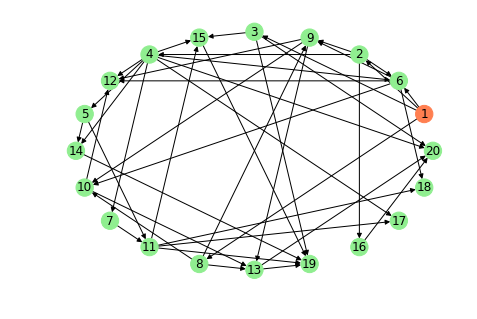

In [375]:
num_nodes = 20
degree = 2
min_edge = 40

G = generate_network(num_nodes=num_nodes, 
                     degree=degree, 
                     min_edge=min_edge, 
                     cost_function=cost_function, 
                     negative_prob=0.1)

print("number of nodes : ", G.number_of_nodes())
print("number of edges : ", G.number_of_edges())

pos = nx.circular_layout(G)
color = make_colormap(num_nodes)
nx.draw(G, pos, node_color = color, with_labels = True)

In [376]:
G.edges(data=True)

OutEdgeDataView([(1, 6, {'cost': 0.1625568823494441}), (1, 2, {'cost': 0.04185520850526936}), (1, 3, {'cost': 0.3040464454994062}), (1, 8, {'cost': 0.38955476690208646}), (6, 12, {'cost': 0.40830160108359637}), (6, 10, {'cost': 0.683492002502215}), (6, 9, {'cost': 0.7898884509873872}), (6, 18, {'cost': 0.3110928475297381}), (2, 6, {'cost': 0.9276975266638987}), (2, 9, {'cost': 0.6205212116829409}), (2, 4, {'cost': 0.452130438741721}), (2, 16, {'cost': 0.13489667173054598}), (9, 10, {'cost': -0.6360244427705696}), (9, 12, {'cost': 0.6482653694296545}), (9, 13, {'cost': 0.9955216345638845}), (3, 20, {'cost': 0.850987984341617}), (3, 15, {'cost': 0.5721857020757585}), (3, 19, {'cost': 0.66479213359552}), (15, 19, {'cost': 0.734190468942157}), (4, 12, {'cost': 0.13516921732003295}), (4, 20, {'cost': 0.3500853025919686}), (4, 5, {'cost': 0.8429695968180928}), (4, 6, {'cost': 0.8806979286289773}), (4, 7, {'cost': 0.9627987178040914}), (4, 14, {'cost': -0.730117216951465}), (4, 15, {'cost': 0